# Setup

In [74]:
%load_ext autoreload
%autoreload 2

In [75]:
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.sparse import coo_matrix

In [4]:
export_path = Path('./pixel-annot-export-v0.10')

# Test Export Files

**Molecular database**

In [5]:
db_df = pd.read_msgpack(export_path / 'db_df.msgpack')

In [8]:
db_df.head()

,db_id,inchi,inchikey,mol_id,mol_name,sf
0,30,InChI=1S/C8H8O4/c9-6-1-2-7(10)5(3-6)4-8(11)12/...,C8H8O4-HMDB0000130,HMDB0000130,Homogentisic acid,C8H8O4
1,30,"InChI=1S/C3H8O3/c4-1-3(6)2-5/h3-6H,1-2H2",C3H8O3-HMDB0000131,HMDB0000131,Glycerol,C3H8O3
2,30,InChI=1S/C5H5N5O/c6-5-9-3-2(4(11)10-5)7-1-8-3/...,C5H5N5O-HMDB0000132,HMDB0000132,Guanine,C5H5N5O
3,30,"InChI=1S/C4H6O4/c1-2(3(5)6)4(7)8/h2H,1H3,(H,5,...",C4H6O4-HMDB0000202,HMDB0000202,Methylmalonic acid,C4H6O4
4,30,InChI=1S/C9H8O3/c10-8(9(11)12)6-7-4-2-1-3-5-7/...,C9H8O3-HMDB0000205,HMDB0000205,Phenylpyruvic acid,C9H8O3


**Ions dataframe**

In [10]:
ion_df = pd.read_msgpack(export_path / 'ion_df.msgpack')

In [11]:
ion_df.head()

,formula,adduct
0,C100H164O,+H
1,C100H164O,+Na
2,C100H164O,+K
3,C100H164O,-H
4,C100H164O,+Cl


**Datasets dataframe**

In [12]:
ds_df = pd.read_msgpack(export_path / 'ds_df.msgpack')

In [60]:
ds_df.head(20).tail()

,analyzer,condition,configJson,id,inputPath,institution,ionisationSource,maldiMatrix,metadataJson,name,organism,organismPart,polarity,principalInvestigator,status,submitter
15,"{'type': 'FTICR', 'resolvingPower': 204779.25}",Control,"{""databases"":[""HMDB-v2.5"",""EMBL-dev1"",""HMDB-v4...",2017-07-11_09h03m42s,s3a://sm-engine-upload/295ad9ba-b998-4d3c-8aca...,Boehringer Ingelheim,MALDI,"2,5-dihydroxybenzoic acid (DHB)","{""Sample_Preparation"":{""Sample_Stabilisation"":...",slide012_animal102_minipig_kidney- total ion c...,Sus scrofa (mini pig),Kidney,POSITIVE,"{'name': 'Michael', 'surname': 'Becker'}",FINISHED,"{'name': 'Michael', 'surname': 'Becker'}"
16,"{'type': 'FTICR', 'resolvingPower': 204779.25}",Control,"{""databases"":[""HMDB-v2.5"",""EMBL-dev1"",""HMDB-v4...",2017-07-10_09h39m30s,s3a://sm-engine-upload/ff3dadb2-8bf1-47d6-922b...,Boehringer Ingelheim,MALDI,"2,5-dihydroxybenzoic acid (DHB)","{""Sample_Preparation"":{""Sample_Stabilisation"":...",slide077_animal121_rat_kidney - total ion count,Rattus norvegicus (rat),Kidney,POSITIVE,"{'name': 'Michael', 'surname': 'Becker'}",FINISHED,"{'name': 'Michael', 'surname': 'Becker'}"
17,"{'type': 'Orbitrap', 'resolvingPower': 169705....",N/A,"{""databases"":[""EMBL-dev1"",""HMDB-v4"",""ChEBI""],""...",2017-06-09_07h13m09s,s3a://sm-engine-upload/d70acead-08ba-48a9-8309...,JLU Giessen,MALDI,"2,5-dihydroxybenzoic acid (DHB)","{""Sample_Preparation"":{""Sample_Stabilisation"":...",Mousebrain_MG08_2017_GruppeA,Mus musculus (mouse),Brain,POSITIVE,"{'name': 'Bernhard', 'surname': 'Spengler'}",FINISHED,"{'name': 'Mario', 'surname': 'Kompauer'}"
18,"{'type': 'Orbitrap', 'resolvingPower': 197989....",Obese,"{""databases"":[""HMDB-v2.5"",""EMBL-dev1"",""HMDB-v4...",2017-05-31_08h59m30s,s3a://sm-engine-upload/b662e30a-e174-434e-a055...,Sanofi FF DMPK,MALDI,"2,5-dihydroxybenzoic acid (DHB)","{""Sample_Preparation"":{""Sample_Stabilisation"":...",Rat51_Section2,Rattus norvegicus (rat),Muscle,POSITIVE,"{'name': 'József', 'surname': 'Pánczél'}",FINISHED,"{'name': 'József', 'surname': 'Pánczél'}"
19,"{'type': 'Orbitrap', 'resolvingPower': 60000}",Control,"{""databases"":[""EMBL-dev1"",""HMDB-v4"",""ChEBI""],""...",2017-05-22_14h50m37s,s3a://sm-engine-upload/25b7d906-44aa-4dc1-b3e4...,U Wisconsin-Madison,MALDI,"2,5-dihydroxybenzoic acid (DHB)","{""Sample_Preparation"":{""Sample_Stabilisation"":...",ST-Pseudo_centroids,Pseudonocardia bacteria,Agar growth,POSITIVE,"{'name': 'Lingjun', 'surname': 'Li'}",FINISHED,"{'name': 'Erin', 'surname': 'Gemperline'}"


In [61]:
ds_name = 'Mousebrain_MG08_2017_GruppeA'
ds_ind = ds_df[ds_df.name == ds_name].index[0]
ds_ind

17

In [62]:
ds_export_path = export_path / 'pixel_df_list' / str(ds_ind)
df = pd.read_msgpack(ds_export_path.open('rb'))
df.shape

(22256601, 7)

In [63]:
df.dtypes

x                int16
y                int16
int            float32
ds_ind           int16
ion_ind          int32
formula_ind      int32
fdr               int8
dtype: object

In [64]:
df.head(10)

,x,y,int,ds_ind,ion_ind,formula_ind,fdr
0,0,0,0.000305,17,28117,5623,5
0,0,0,0.000305,17,28075,5615,5
0,0,0,0.209430,17,34165,6833,5
0,0,0,0.054963,17,28116,5623,5
0,0,0,0.054963,17,28100,5620,5
0,0,0,0.054963,17,28147,5629,5
0,0,0,0.569924,17,28135,5627,5
0,0,0,0.569924,17,28161,5632,5
0,0,0,0.525093,17,28085,5617,5
0,0,0,0.525093,17,28146,5629,5


In [65]:
df.ion_ind.unique().size

1993

In [66]:
x, y = 10, 10
pixel = df[(df.x == x)&(df.y == y)]
pixel.head()

,x,y,int,ds_ind,ion_ind,formula_ind,fdr
1556,10,10,0.007462,17,28117,5623,5
1556,10,10,0.007462,17,28075,5615,5
1779,10,10,0.046525,17,34165,6833,5
1758,10,10,0.109255,17,28116,5623,5
1758,10,10,0.109255,17,28100,5620,5


In [67]:
ion_idx = pixel.ion_ind.iloc[0]
ion_idx, tuple(ion_df.loc[ion_idx])

(28117, ('C28H17KO13', '+K'))

In [68]:
img_df = df[(df.ion_ind == ion_idx)]
img_df.head()

,x,y,int,ds_ind,ion_ind,formula_ind,fdr
0,0,0,0.000305,17,28117,5623,5
155,0,1,0.007691,17,28117,5623,5
312,0,2,0.016068,17,28117,5623,5
464,0,3,0.001663,17,28117,5623,5
612,0,4,0.004471,17,28117,5623,5


In [69]:
from urllib.parse import quote_plus

ds_id = ds_df['id'].loc[pixel.ds_ind.iloc[0]]
mol, adduct = ion_df.loc[pixel.ion_ind.iloc[0]]
fdr = pixel.fdr.iloc[0] / 100
url = ('http://metaspace2020.eu/#/annotations?ds={}&mol={}&add={}&fdr={}'
       .format(ds_id, mol, quote_plus(adduct), fdr))
print(url)

http://metaspace2020.eu/#/annotations?ds=2017-06-09_07h13m09s&mol=C28H17KO13&add=%2BK&fdr=0.05


In [72]:
img_coo = coo_matrix((img_df.int.values, (img_df.y.values, img_df.x.values)))

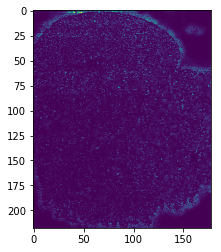

In [76]:
plt.imshow(img_coo.toarray())